## Librerie

In [ ]:
# import all needed packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report, mean_squared_error, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from time import time
from torchvision.transforms import ToTensor
import torch.utils.data as data
import random

torch.manual_seed(10)
np.random.seed(20)
random.seed(30)

In [ ]:
batch_size = 32

data_transforms = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  #standrad scaler

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=data_transforms)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=data_transforms)

dataset = torch.utils.data.ConcatDataset([trainset, testset])

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## Pre-processing

In [ ]:
#testset

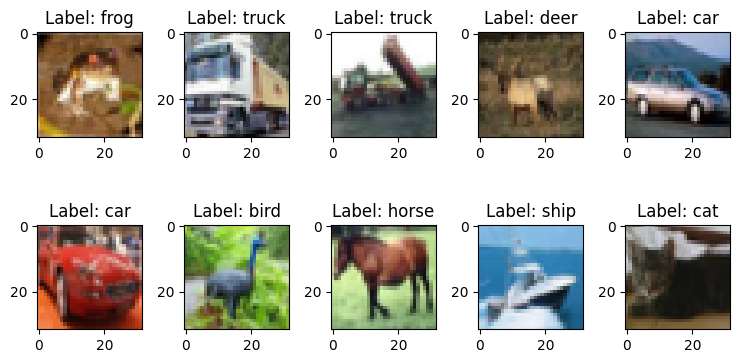

In [ ]:
num_row = 2
num_col = 5

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col, 2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(trainset.data[i], cmap='gray')
    ax.set_title('Label: {}'.format(classes[trainset.targets[i]]))
plt.tight_layout()
plt.show()

In [ ]:
# printing data shapes
print("Single image dimensions:", trainset.data[0].shape)
for images, labels in trainloader:
    print("Image batch dimensions:", images.shape)
    print("Image label dimensions:", labels.shape)
    break

Single image dimensions: (32, 32, 3)
Image batch dimensions: torch.Size([32, 3, 32, 32])
Image label dimensions: torch.Size([32])


In [ ]:
trainset, valset = torch.utils.data.random_split(trainset, [40000, 10000])

# crea i dataloader per il training e la validazione
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=False)

In [ ]:
#len(trainset)

In [ ]:
#len(valset)

In [ ]:
print("The number of images in a training set is: ", len(trainloader)*batch_size)
print("The number of images in a validation set is: ", len(valloader)*batch_size)
print("The number of images in a test set is: ", len(testloader)*batch_size)
print("The number of batches per epoch is: ", len(trainloader))

The number of images in a training set is:  40000
The number of images in a validation set is:  10016
The number of images in a test set is:  10016
The number of batches per epoch is:  1250


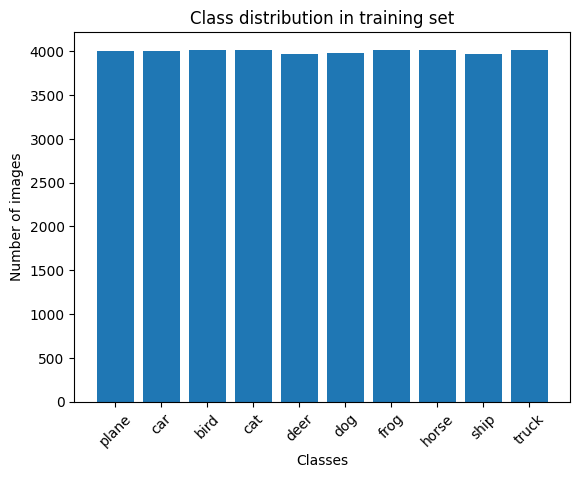

In [ ]:
train_labels = np.array([trainset.dataset.targets[idx] for idx in trainset.indices])
train_counts = np.bincount(train_labels)

plt.bar(classes, train_counts)
plt.xticks(rotation=45)
plt.xlabel('Classes')
plt.ylabel('Number of images')
plt.title('Class distribution in training set')
plt.show()

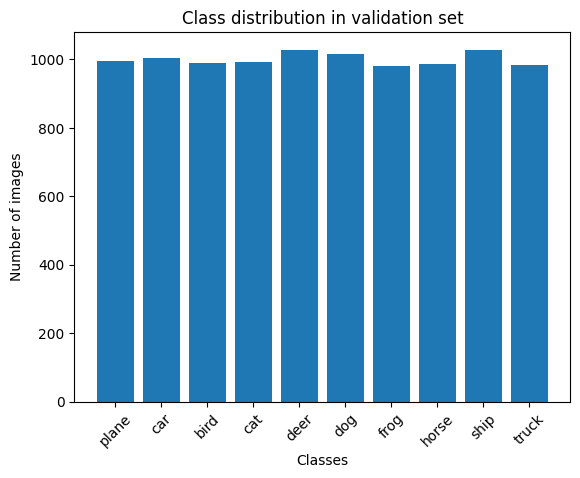

In [ ]:
val_labels = np.array([trainset.dataset.targets[idx] for idx in valset.indices])
val_counts = np.bincount(val_labels)

plt.bar(classes, val_counts)
plt.xticks(rotation=45)
plt.xlabel('Classes')
plt.ylabel('Number of images')
plt.title('Class distribution in validation set')
plt.show()

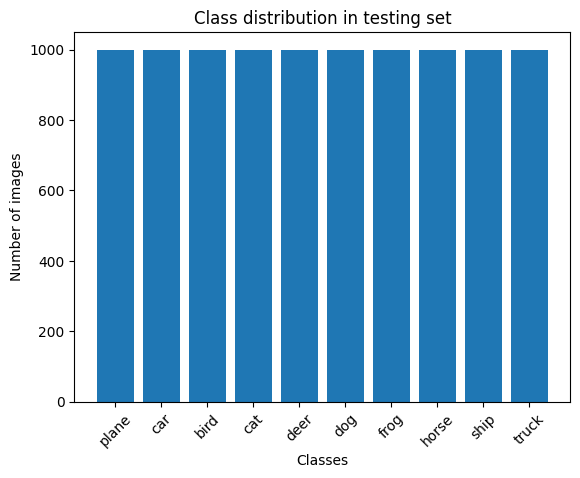

In [ ]:
_, counts = np.unique(testset.targets, return_counts=True)

plt.bar(classes, counts)
plt.xticks(rotation=45)
plt.xlabel('Classes')
plt.ylabel('Number of images')
plt.title('Class distribution in testing set')
plt.show()

# Unsupervised Learning

In [ ]:
all_images = torch.stack([img for img, label in dataset], dim=0)

X = all_images.view(all_images.shape[0], -1).numpy()
y = np.array([label for img, label in dataset])

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
np.max(X)

2.6316736

In [ ]:
np.min(X)

-2.203603

In [ ]:
X.shape

(60000, 3072)

In [ ]:
y.shape

(60000,)

## PCA

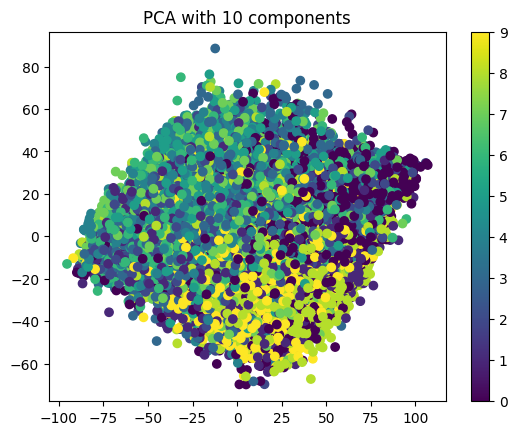

In [ ]:
pca = PCA(n_components=10)
projection  = pca.fit_transform(X)

plt.scatter(projection [:, 0], projection [:, 1], c=y)
plt.colorbar()
plt.title('PCA with 10 components')
plt.show()

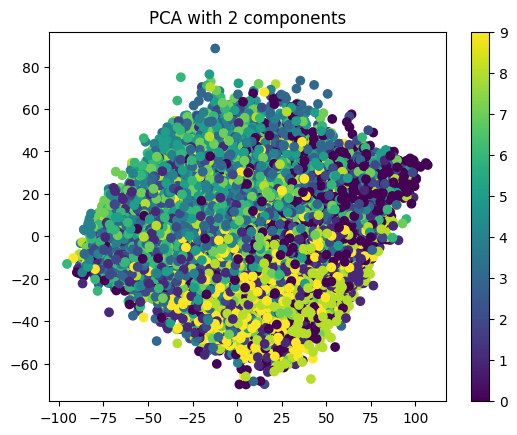

In [ ]:
pca = PCA(n_components=2)
projection  = pca.fit_transform(X)

plt.scatter(projection [:, 0], projection [:, 1], c=y)
plt.colorbar()
plt.title('PCA with 2 components')
plt.show()

## K-Means

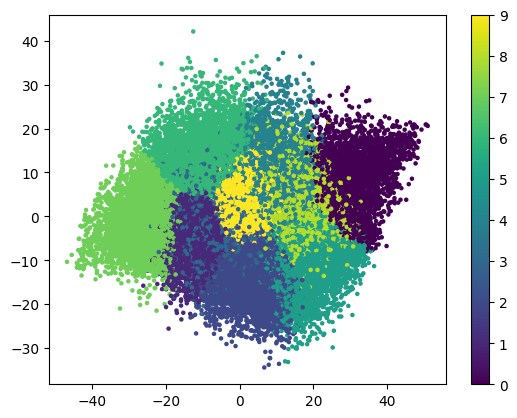

0.07916455190263277

In [ ]:
# k is set to the ground truth number of clusters
kmeans = KMeans(n_clusters=10, random_state=42, n_init=20).fit(X)
cluster_labels = kmeans.labels_

# Plot the projection according to the k-means clusters
plt.scatter(projection[:,0], projection[:,1], c=cluster_labels, cmap='viridis', s=5)
plt.colorbar()
plt.show()
normalized_mutual_info_score(kmeans.labels_, y.flatten())

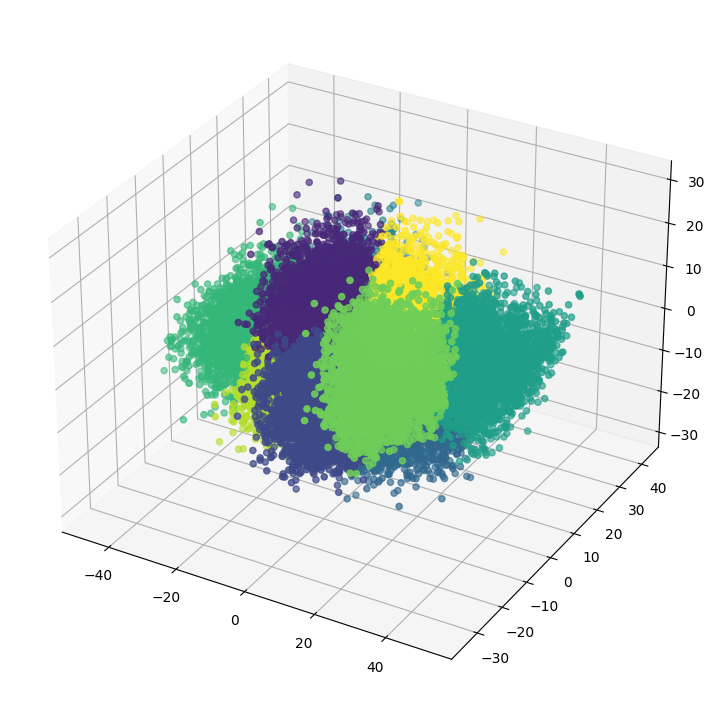

In [ ]:
# k is set to the ground truth number of clusters
kmeans = KMeans(n_clusters=10, random_state=42, n_init=1).fit(X)
# Plot the projection according to the k-means clusters
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(projection='3d')
ax.scatter(projection[:,0], projection[:,1], projection[:,2], c=kmeans.labels_)
plt.show()

## t-SNE

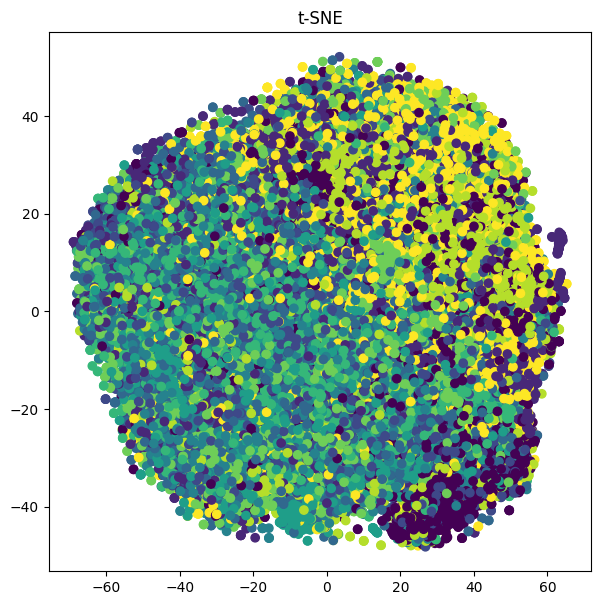

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_iter=1000, perplexity = 50, random_state=0)
tsne_features = tsne.fit_transform(X)

fig, ax =plt.subplots(figsize=(7,7))
ax.scatter(tsne_features[:,0],tsne_features[:,1], c=y)
ax.set_title('t-SNE')
plt.show()

## DBSCAN

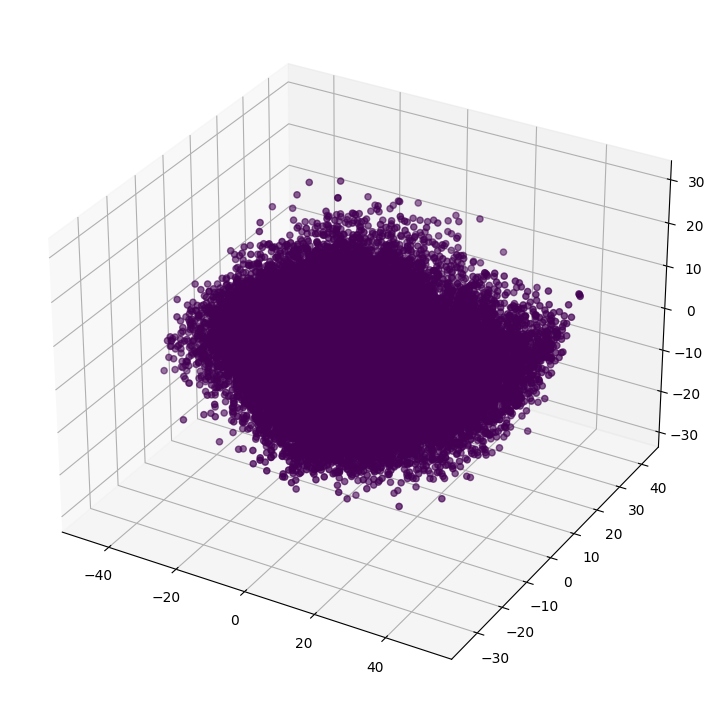

In [ ]:
dbscan = DBSCAN(eps=0.7, min_samples=12).fit(X)

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(projection='3d')
ax.scatter(projection[:,0],projection[:,1], projection[:,2],c=dbscan.labels_)
plt.show()

# Supervised Learning

In [ ]:
X_train = X[:40000]
X_val = X[40000:50000]
X_test = X[50000:]

y_train = y[:40000]
y_val = y[40000:50000]
y_test = y[50000:]

In [ ]:
X_val.shape

(10000, 3072)

## Model Building

### Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

acc_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Accuracy Score of Gaussian Naive Bayes is : {acc_gnb}")

Accuracy Score of Gaussian Naive Bayes is : 0.2971


In [ ]:
clf_report = classification_report(y_test, y_pred_gnb)
print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.27      0.49      0.35      1000
           1       0.40      0.16      0.23      1000
           2       0.17      0.07      0.10      1000
           3       0.25      0.07      0.11      1000
           4       0.24      0.42      0.31      1000
           5       0.31      0.27      0.29      1000
           6       0.25      0.46      0.33      1000
           7       0.43      0.13      0.20      1000
           8       0.38      0.47      0.42      1000
           9       0.38      0.41      0.39      1000

    accuracy                           0.30     10000
   macro avg       0.31      0.30      0.27     10000
weighted avg       0.31      0.30      0.27     10000



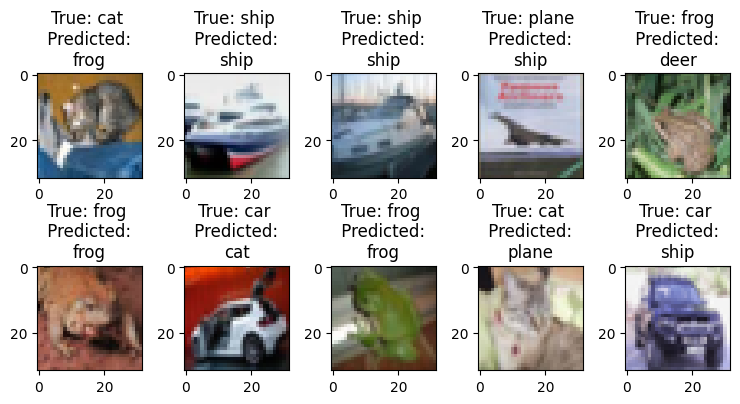

In [ ]:
num_row = 2
num_col = 5

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col, 2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(testset.data[i], cmap='gray')
    ax.set_title('True: {} \n Predicted: \n{}'.format(classes[y_test[i]], classes[y_pred_gnb[i]]))
plt.tight_layout()
plt.show()

### K-Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_val)

acc_knn = accuracy_score(y_val, y_pred_knn)
print(f"Accuracy Score of KNN is : {acc_knn}")

Accuracy Score of KNN is : 0.3269


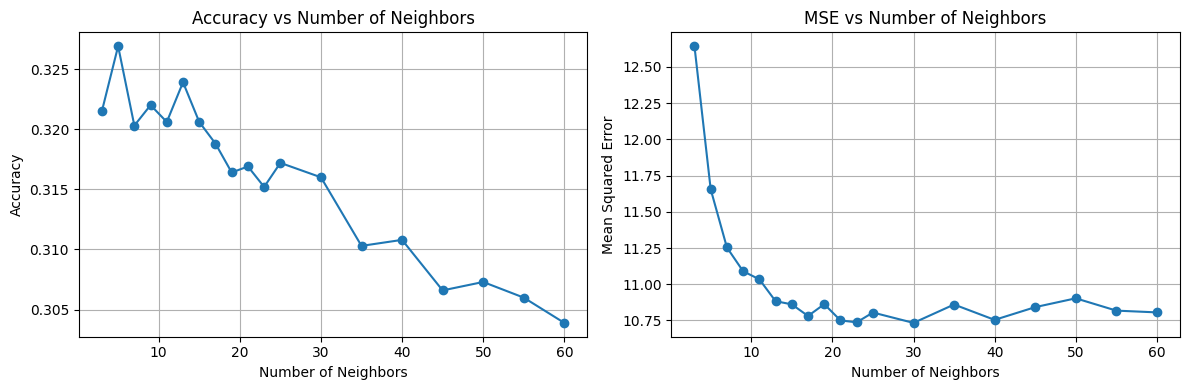

In [ ]:
neighbors = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 30, 35, 40, 45, 50, 55, 60]
accuracies = []
val_mse = []

for nb in neighbors:
    knn = KNeighborsClassifier(n_neighbors=nb)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_val)
    iter_val_mse = mean_squared_error(y_val, y_pred_knn)
    val_mse.append(iter_val_mse)
    acc_knn = accuracy_score(y_val, y_pred_knn)
    accuracies.append(acc_knn)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(neighbors, accuracies, marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Neighbors')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(neighbors, val_mse, marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Number of Neighbors')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy Score of KNN is : {acc_knn}")

Accuracy Score of KNN is : 0.328


In [ ]:
clf_report = classification_report(y_test, y_pred_knn)
print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.46      0.50      0.48      1000
           1       0.79      0.15      0.25      1000
           2       0.22      0.43      0.29      1000
           3       0.32      0.15      0.20      1000
           4       0.21      0.56      0.30      1000
           5       0.47      0.20      0.28      1000
           6       0.33      0.28      0.31      1000
           7       0.68      0.16      0.26      1000
           8       0.37      0.73      0.49      1000
           9       0.74      0.13      0.22      1000

    accuracy                           0.33     10000
   macro avg       0.46      0.33      0.31     10000
weighted avg       0.46      0.33      0.31     10000



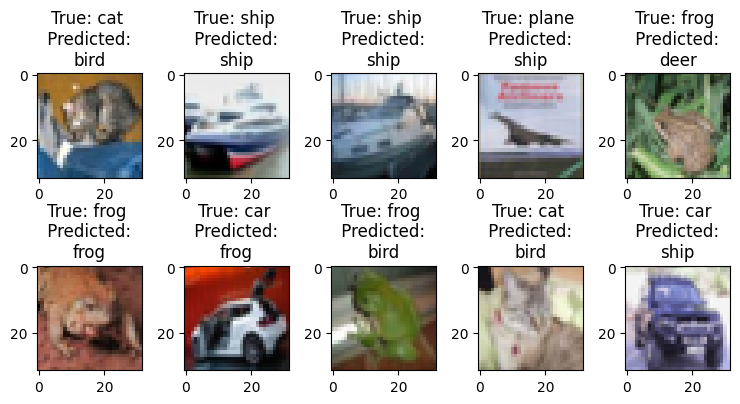

In [ ]:
num_row = 2
num_col = 5

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col, 2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(testset.data[i], cmap='gray')
    ax.set_title('True: {} \n Predicted: \n{}'.format(classes[y_test[i]], classes[y_pred_knn[i]]))
plt.tight_layout()
plt.show()

### Decision Tree Classifier

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_val)

acc_dtc = accuracy_score(y_val, y_pred_dtc)
print(f"Accuracy Score of Decision Tree is : {acc_dtc}")

Accuracy Score of Decision Tree is : 0.2673


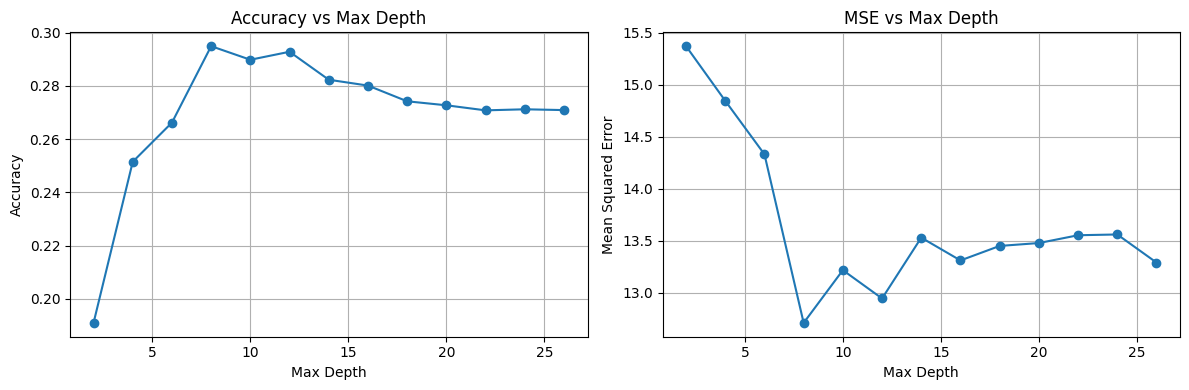

In [ ]:
max_depth = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26]
accuracies = []
val_mse = []

for i in max_depth:
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_train, y_train)
    y_pred_dtc = dtc.predict(X_val)
    iter_val_mse = mean_squared_error(y_val, y_pred_dtc)
    val_mse.append(iter_val_mse)
    acc_dtc = accuracy_score(y_val, y_pred_dtc)
    accuracies.append(acc_dtc)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(max_depth, accuracies, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(max_depth, val_mse, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Max Depth')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
dtc = DecisionTreeClassifier(max_depth=8)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
print(f"Accuracy Score of Decision Tree is : {acc_dtc}")

Accuracy Score of Decision Tree is : 0.2962


In [ ]:
clf_report = classification_report(y_test, y_pred_dtc)
print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.41      0.39      0.40      1000
           1       0.35      0.29      0.31      1000
           2       0.19      0.17      0.18      1000
           3       0.18      0.17      0.18      1000
           4       0.26      0.26      0.26      1000
           5       0.28      0.25      0.26      1000
           6       0.26      0.41      0.32      1000
           7       0.27      0.27      0.27      1000
           8       0.41      0.38      0.40      1000
           9       0.36      0.36      0.36      1000

    accuracy                           0.30     10000
   macro avg       0.30      0.30      0.30     10000
weighted avg       0.30      0.30      0.30     10000



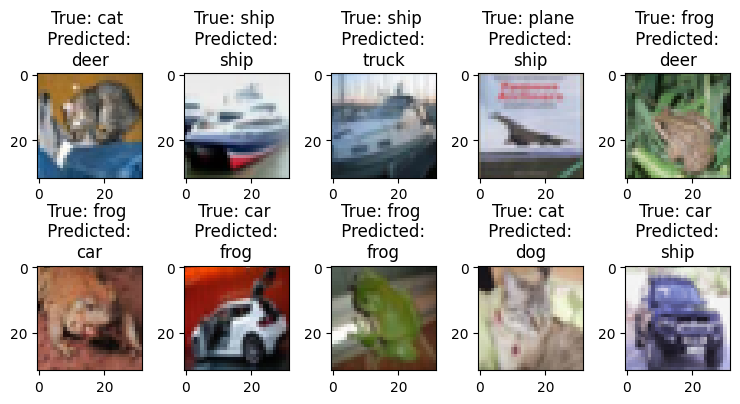

In [ ]:
num_row = 2
num_col = 5

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col, 2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(testset.data[i], cmap='gray')
    ax.set_title('True: {} \n Predicted: \n{}'.format(classes[y_test[i]], classes[y_pred_dtc[i]]))
plt.tight_layout()
plt.show()

### Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_val)

acc_rfc = accuracy_score(y_val, y_pred_rfc)
print(f"Accuracy Score of Random Forest is : {acc_rfc}")

Accuracy Score of Random Forest is : 0.4571


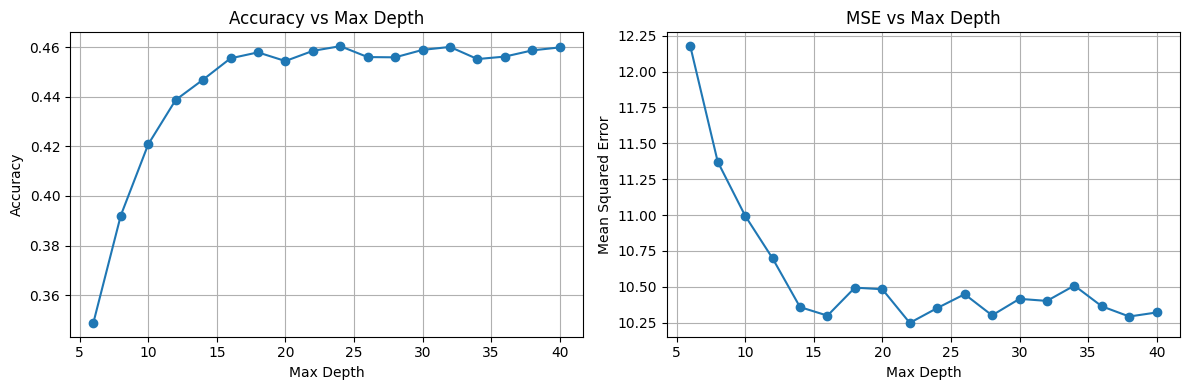

In [ ]:
max_depth = [6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40]
accuracies = []
val_mse = []

for i in max_depth:
    rfc = RandomForestClassifier(max_depth=i)
    rfc.fit(X_train, y_train)
    y_pred_rfc = rfc.predict(X_val)
    iter_val_mse = mean_squared_error(y_val, y_pred_rfc)
    val_mse.append(iter_val_mse)
    acc_rfc = accuracy_score(y_val, y_pred_rfc)
    accuracies.append(acc_rfc)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(max_depth, accuracies, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(max_depth, val_mse, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Max Depth')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
rfc = RandomForestClassifier(max_depth=24)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

acc_rfc = accuracy_score(y_test, y_pred_rfc)
print(f"Accuracy Score of Random Forest is : {acc_rfc}")

Accuracy Score of Random Forest is : 0.4597


In [ ]:
clf_report = classification_report(y_test, y_pred_rfc)
print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.55      0.55      0.55      1000
           1       0.53      0.54      0.53      1000
           2       0.38      0.34      0.36      1000
           3       0.34      0.26      0.29      1000
           4       0.40      0.41      0.40      1000
           5       0.42      0.39      0.40      1000
           6       0.45      0.57      0.51      1000
           7       0.52      0.46      0.49      1000
           8       0.57      0.61      0.59      1000
           9       0.46      0.54      0.50      1000

    accuracy                           0.47     10000
   macro avg       0.46      0.47      0.46     10000
weighted avg       0.46      0.47      0.46     10000



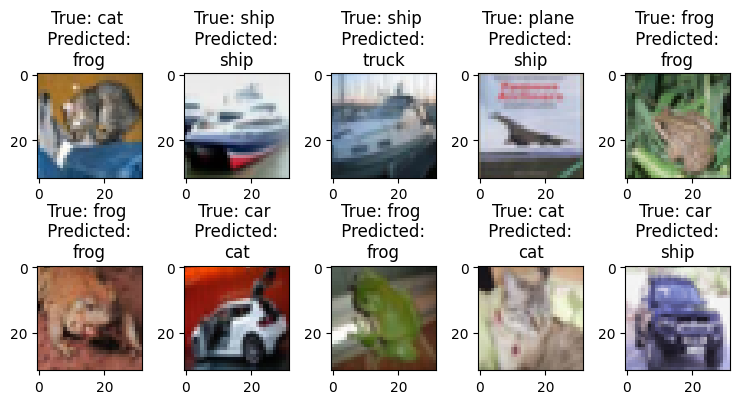

In [ ]:
num_row = 2
num_col = 5

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col, 2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(testset.data[i], cmap='gray')
    ax.set_title('True: {} \n Predicted: \n{}'.format(classes[y_test[i]], classes[y_pred_rfc[i]]))
plt.tight_layout()
plt.show()

### Support Vector Machines

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy Score of Support Vector Machine is : {acc_svm}")

Accuracy Score of Support Vector Machine is : 0.5367


In [ ]:
clf_report = classification_report(y_test, y_pred_svm)
print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.61      0.62      0.61      1000
           1       0.64      0.65      0.64      1000
           2       0.41      0.40      0.41      1000
           3       0.37      0.38      0.37      1000
           4       0.47      0.43      0.45      1000
           5       0.49      0.42      0.45      1000
           6       0.53      0.63      0.58      1000
           7       0.62      0.56      0.59      1000
           8       0.64      0.68      0.66      1000
           9       0.58      0.60      0.59      1000

    accuracy                           0.54     10000
   macro avg       0.54      0.54      0.53     10000
weighted avg       0.54      0.54      0.53     10000



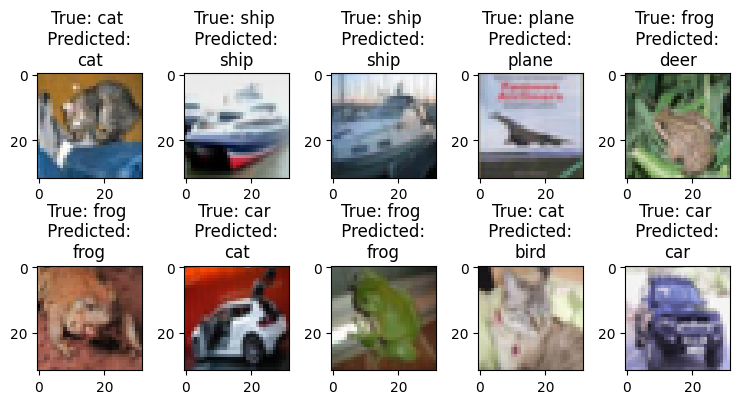

In [ ]:
num_row = 2
num_col = 5

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col, 2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(testset.data[i], cmap='gray')
    ax.set_title('True: {} \n Predicted: \n{}'.format(classes[y_test[i]], classes[y_pred_svm[i]]))
plt.tight_layout()
plt.show()

### Models Comparison

In [ ]:
models = pd.DataFrame({
    'Model' : ['Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree Classifier', 'Random Forest Classifier', 'Support Vector Machines'],
    'Score' : [acc_gnb, acc_knn, acc_dtc, acc_rfc, acc_svm]})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Support Vector Machines,0.5367
3,Random Forest Classifier,0.4597
1,K-Nearest Neighbors,0.3280
0,Gaussian Naive Bayes,0.2971
2,Decision Tree Classifier,0.2962


In [ ]:
fig = px.bar(data_frame=models, x='Score', y='Model', color='Score', template='plotly_white', title='Models Comparison')
fig.update_traces(marker=dict(line=dict(color='black', width=1)))
fig.show()

In [ ]:
report_gnb = classification_report(y_test, y_pred_gnb, output_dict=True)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
report_dtc = classification_report(y_test, y_pred_dtc, output_dict=True)
report_rfc = classification_report(y_test, y_pred_rfc, output_dict=True)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

data = {
    'Model': ['Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree Classifier', 'Random Forest Classifier', 'Support Vector Machine'],
    'Accuracy': [acc_gnb, acc_knn, acc_dtc, acc_rfc, acc_svm],
    'Precision': [report_gnb['weighted avg']['precision'], report_knn['weighted avg']['precision'],
                  report_dtc['weighted avg']['precision'], report_rfc['weighted avg']['precision'],
                  report_svm['weighted avg']['precision']],
    'Recall': [report_gnb['weighted avg']['recall'], report_knn['weighted avg']['recall'],
               report_dtc['weighted avg']['recall'], report_rfc['weighted avg']['recall'],
               report_svm['weighted avg']['recall']],
    'F1-Score': [report_gnb['weighted avg']['f1-score'], report_knn['weighted avg']['f1-score'],
                 report_dtc['weighted avg']['f1-score'], report_rfc['weighted avg']['f1-score'],
                 report_svm['weighted avg']['f1-score']]
}

df = pd.DataFrame(data)

table = df.to_string(index=False)
print(table)

                   Model  Accuracy  Precision  Recall  F1-Score
    Gaussian Naive Bayes    0.2971   0.309059  0.2971  0.274358
     K-Nearest Neighbors    0.3280   0.459874  0.3280  0.308109
Decision Tree Classifier    0.2962   0.298244  0.2962  0.295005
Random Forest Classifier    0.4597   0.455098  0.4597  0.455579
  Support Vector Machine    0.5367   0.535207  0.5367  0.534905


# funzioni NN

In [ ]:
def get_accuracy(logit, target):
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects / target.size(0)
    return accuracy.item()

def train_model(model, num_epochs, trainloader, valloader, criterion, optimizer):

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    train_losses = []
    train_accs = []
    val_losses = []
    val_accs = []

    for epoch in range(num_epochs):
        train_running_loss = 0.0
        train_acc = 0.0
        val_running_loss = 0.0
        val_acc = 0.0

        # Set the model to training mode
        model = model.train()
        start = time()

        ## training step
        for i, (images, labels) in enumerate(trainloader):

            images = images.to(device)
            labels = labels.to(device)

            ## forward + backprop + loss
            logits = model(images)
            loss = criterion(logits, labels)

            # Reset the gradients to zero
            optimizer.zero_grad()

            loss.backward()

            ## update model params
            optimizer.step()

            train_running_loss += loss.item()
            train_acc += get_accuracy(logits, labels)

        train_losses.append(train_running_loss / i)
        train_accs.append(train_acc/i)

        ## validation step
        with torch.no_grad():
            model = model.eval()
            for j, (images, labels) in enumerate(valloader):

                images = images.to(device)
                labels = labels.to(device)

                logits = model(images)
                loss = criterion(logits, labels)

                val_running_loss += loss.item()
                val_acc += get_accuracy(logits, labels)

        val_losses.append(val_running_loss / j)
        val_accs.append(val_acc/j)

        model.eval()
        print(f"Epoch: {epoch+1} | Train Loss: {train_losses[-1]:.4f} | Train Accuracy: {train_accs[-1]:.4f} | Validation Loss: {val_losses[-1]:.4f} | Validation Accuracy: {val_accs[-1]:.4f} | Time: {time()-start:.2f}")

    return train_losses, train_accs, val_losses, val_accs

In [ ]:
def test_model(model, num_epochs, trainloader, testloader, criterion, optimizer):

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    train_losses = []
    train_accs = []
    test_losses = []
    test_accs = []

    for epoch in range(num_epochs):
        train_running_loss = 0.0
        train_acc = 0.0
        test_running_loss = 0.0
        test_acc = 0.0

        # Set the model to training mode
        model = model.train()
        start = time()

        ## training step
        for i, (images, labels) in enumerate(trainloader):

            images = images.to(device)
            labels = labels.to(device)

            ## forward + backprop + loss
            logits = model(images)
            loss = criterion(logits, labels)

            # Reset the gradients to zero
            optimizer.zero_grad()

            loss.backward()

            ## update model params
            optimizer.step()

            train_running_loss += loss.item()
            train_acc += get_accuracy(logits, labels)

        train_losses.append(train_running_loss / i)
        train_accs.append(train_acc/i)

        ## testing step
        with torch.no_grad():
            model = model.eval()
            for j, (images, labels) in enumerate(testloader):

                images = images.to(device)
                labels = labels.to(device)

                logits = model(images)
                loss = criterion(logits, labels)

                test_running_loss += loss.item()
                test_acc += get_accuracy(logits, labels)

        test_losses.append(test_running_loss / j)
        test_accs.append(test_acc/j)

        model.eval()
        print(f"Epoch: {epoch+1} | Train Loss: {train_losses[-1]:.4f} | Train Accuracy: {train_accs[-1]:.4f} | Test Loss: {test_losses[-1]:.4f} | Test Accuracy: {test_accs[-1]:.4f} | Time: {time()-start:.2f}")

    return train_losses, train_accs, test_losses, test_accs

In [ ]:
def im_convert(tensor):
  image = tensor.cpu().clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1)
  return image

# Convolutional Neural Network (1)

In [ ]:
class CNN_1(nn.Module):
    def __init__(self):
        super(CNN_1, self).__init__()
        self.conv1 = nn.Conv2d(3,   64,  3)
        self.conv2 = nn.Conv2d(64,  128, 3)
        self.conv3 = nn.Conv2d(128, 256, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 4 * 4, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

In [ ]:
model_1 = CNN_1()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_1.to(device)

CNN_1(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
epochs = 10
#model_1 = CNN_1()
criterion = nn.CrossEntropyLoss() # loss function
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.001)

_, _, _, _, = train_model(model_1, epochs, trainloader, valloader, criterion, optimizer)

Epoch: 1 | Train Loss: 1.5287 | Train Accuracy: 43.4498 | Validation Loss: 1.2856 | Validation Accuracy: 54.0966 | Time: 22.85
Epoch: 2 | Train Loss: 1.1061 | Train Accuracy: 60.5760 | Validation Loss: 1.0074 | Validation Accuracy: 64.7336 | Time: 20.34
Epoch: 3 | Train Loss: 0.8921 | Train Accuracy: 68.5523 | Validation Loss: 0.8845 | Validation Accuracy: 69.6815 | Time: 21.13
Epoch: 4 | Train Loss: 0.7448 | Train Accuracy: 73.6639 | Validation Loss: 0.8944 | Validation Accuracy: 69.4111 | Time: 21.04
Epoch: 5 | Train Loss: 0.6348 | Train Accuracy: 77.9899 | Validation Loss: 0.8409 | Validation Accuracy: 71.2640 | Time: 20.96
Epoch: 6 | Train Loss: 0.5367 | Train Accuracy: 81.4351 | Validation Loss: 0.8517 | Validation Accuracy: 72.3558 | Time: 20.95
Epoch: 7 | Train Loss: 0.4529 | Train Accuracy: 84.2599 | Validation Loss: 0.8712 | Validation Accuracy: 72.1054 | Time: 20.78
Epoch: 8 | Train Loss: 0.3800 | Train Accuracy: 86.7119 | Validation Loss: 0.9561 | Validation Accuracy: 72.205

#### validation

In [ ]:
# tuning of hyper-parameters using Adam
learning_rates = [0.1, 0.01, 0.001, 0.0001]

for lr in learning_rates:
    model_1 = CNN_1()
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model_1.parameters(), lr=lr)

    train_losses = []
    train_accs = []
    val_losses = []
    val_accs = []

    print("Learning rate:", lr)

    for epoch in range(10):
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        model_1 = model_1.to(device)

        train_running_loss = 0.0
        train_acc = 0.0
        val_running_loss = 0.0
        val_acc = 0.0

        # Set the model to training mode
        model_1 = model_1.train()
        start = time()

        ## training step
        for i, (images, labels) in enumerate(trainloader):

            images = images.to(device)
            labels = labels.to(device)

            ## forward + backprop + loss
            logits = model_1(images)
            loss = criterion(logits, labels)

            # Reset the gradients to zero
            optimizer.zero_grad()

            loss.backward()

            ## update model params
            optimizer.step()

            train_running_loss += loss.item()
            train_acc += get_accuracy(logits, labels)

        train_losses.append(train_running_loss / i)
        train_accs.append(train_acc/i)

        ## validation step
        with torch.no_grad():
            model_1 = model_1.eval()
            for j, (images, labels) in enumerate(valloader):

                images = images.to(device)
                labels = labels.to(device)

                logits = model_1(images)
                loss = criterion(logits, labels)

                val_running_loss += loss.item()
                val_acc += get_accuracy(logits, labels)

        val_losses.append(val_running_loss / j)
        val_accs.append(val_acc/j)

        model_1.eval()
        print(f"Epoch: {epoch+1} | Train Loss: {train_losses[-1]:.4f} | Train Accuracy: {train_accs[-1]:.4f} | Validation Loss: {val_losses[-1]:.4f} | Validation Accuracy: {val_accs[-1]:.4f} | Time: {time()-start:.2f}")

Learning rate: 0.1
Epoch: 1 | Train Loss: 138.9642 | Train Accuracy: 9.9755 | Validation Loss: 2.3153 | Validation Accuracy: 9.8858 | Time: 20.42
Epoch: 2 | Train Loss: 2.3170 | Train Accuracy: 9.9530 | Validation Loss: 2.3204 | Validation Accuracy: 10.0461 | Time: 21.02
Epoch: 3 | Train Loss: 2.3169 | Train Accuracy: 10.0155 | Validation Loss: 2.3222 | Validation Accuracy: 9.9659 | Time: 20.94
Epoch: 4 | Train Loss: 2.3174 | Train Accuracy: 9.7778 | Validation Loss: 2.3191 | Validation Accuracy: 9.9659 | Time: 20.95
Epoch: 5 | Train Loss: 2.3165 | Train Accuracy: 9.9680 | Validation Loss: 2.3363 | Validation Accuracy: 9.8858 | Time: 21.82
Epoch: 6 | Train Loss: 2.3171 | Train Accuracy: 10.1031 | Validation Loss: 2.3322 | Validation Accuracy: 9.9159 | Time: 21.52
Epoch: 7 | Train Loss: 2.3179 | Train Accuracy: 9.9079 | Validation Loss: 2.3159 | Validation Accuracy: 10.3065 | Time: 21.04
Epoch: 8 | Train Loss: 2.3174 | Train Accuracy: 9.7953 | Validation Loss: 2.3169 | Validation Accura

#### testing

In [ ]:
epochs = 30
#model_1 = CNN_1()
criterion = nn.CrossEntropyLoss() # loss function
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.001)

train_losses_1, train_accs_1, test_losses_1, test_accs_1, = test_model(model_1, epochs, trainloader, testloader, criterion, optimizer)

Epoch: 1 | Train Loss: 1.1257 | Train Accuracy: 60.6710 | Test Loss: 0.9975 | Test Accuracy: 65.3345 | Time: 20.97
Epoch: 2 | Train Loss: 0.8972 | Train Accuracy: 68.9026 | Test Loss: 0.8784 | Test Accuracy: 70.0321 | Time: 21.55
Epoch: 3 | Train Loss: 0.7276 | Train Accuracy: 74.7973 | Test Loss: 0.8472 | Test Accuracy: 71.3742 | Time: 21.47
Epoch: 4 | Train Loss: 0.5970 | Train Accuracy: 79.2384 | Test Loss: 0.8242 | Test Accuracy: 72.9667 | Time: 21.76
Epoch: 5 | Train Loss: 0.4940 | Train Accuracy: 82.7887 | Test Loss: 0.8381 | Test Accuracy: 74.6695 | Time: 20.71
Epoch: 6 | Train Loss: 0.3946 | Train Accuracy: 86.4592 | Test Loss: 0.8648 | Test Accuracy: 74.6995 | Time: 21.53
Epoch: 7 | Train Loss: 0.3095 | Train Accuracy: 89.2864 | Test Loss: 0.9232 | Test Accuracy: 73.7680 | Time: 21.45
Epoch: 8 | Train Loss: 0.2492 | Train Accuracy: 91.5182 | Test Loss: 1.0212 | Test Accuracy: 73.7280 | Time: 20.64
Epoch: 9 | Train Loss: 0.2101 | Train Accuracy: 92.7017 | Test Loss: 1.0169 | Te

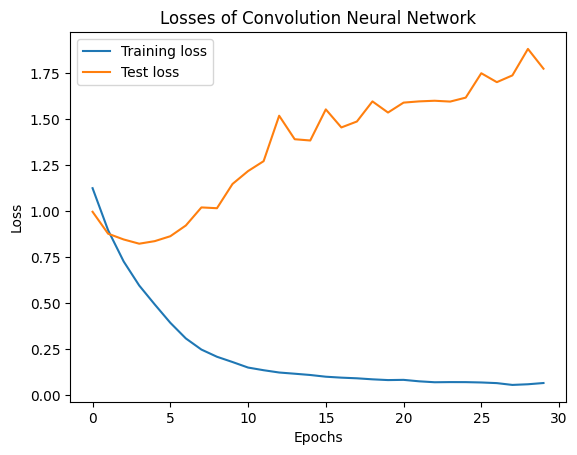

In [ ]:
plt.plot(train_losses_1, label='Training loss')
plt.plot(test_losses_1, label='Test loss')
plt.legend()
plt.title('Losses of Convolution Neural Network')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
# overfitting

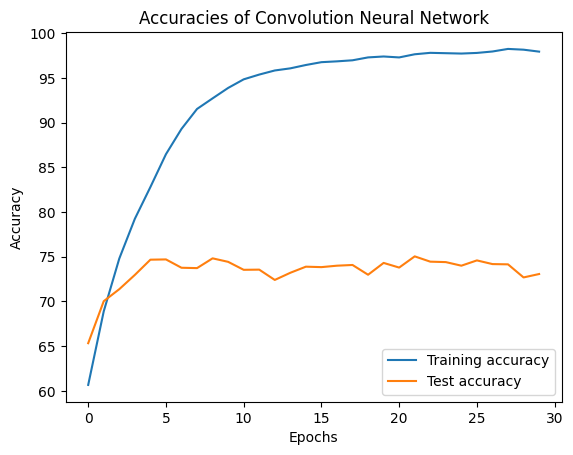

In [ ]:
plt.plot(train_accs_1, label='Training accuracy')
plt.plot(test_accs_1, label='Test accuracy')
plt.legend()
plt.title('Accuracies of Convolution Neural Network')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

#### result

In [ ]:
correct = 0
total = 0

# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        # calculate outputs by running images through the network
        outputs = model_1(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: {:.2f}%'.format(
    100 * correct / total))  # 68.48%

Accuracy of the network on the 10000 test images: 72.82%


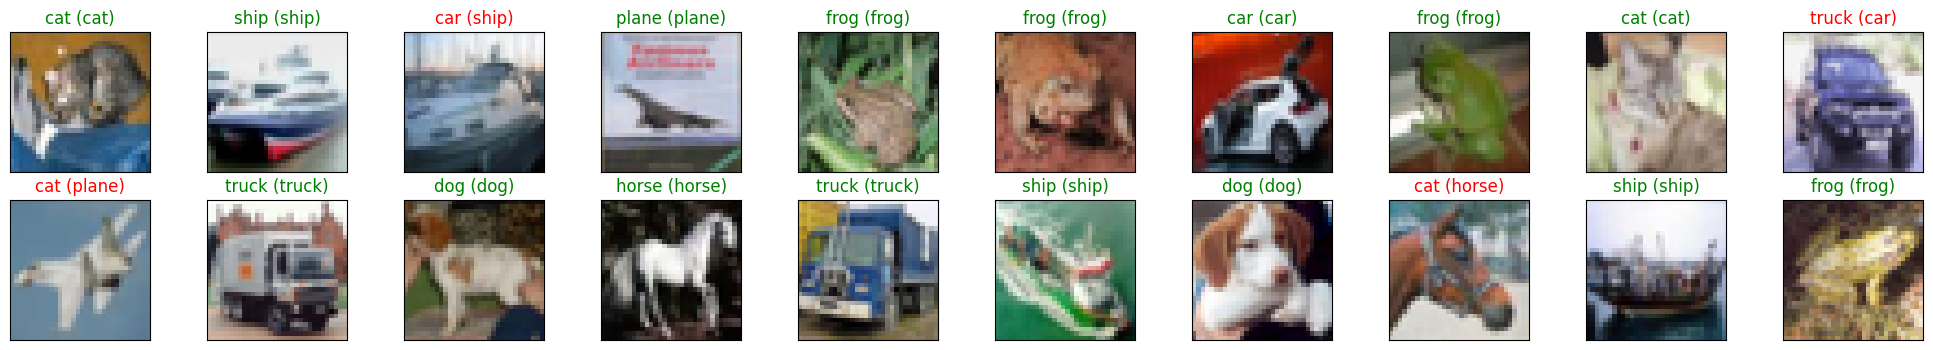

In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)
images = images.to(device)
labels = labels.to(device)
output = model_1(images)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color=("green" if preds[idx]==labels[idx] else "red"))

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = model_1(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class plane is: 71.6 %
Accuracy for class car   is: 83.6 %
Accuracy for class bird  is: 65.3 %
Accuracy for class cat   is: 61.0 %
Accuracy for class deer  is: 69.7 %
Accuracy for class dog   is: 54.5 %
Accuracy for class frog  is: 86.6 %
Accuracy for class horse is: 76.9 %
Accuracy for class ship  is: 86.2 %
Accuracy for class truck is: 72.8 %


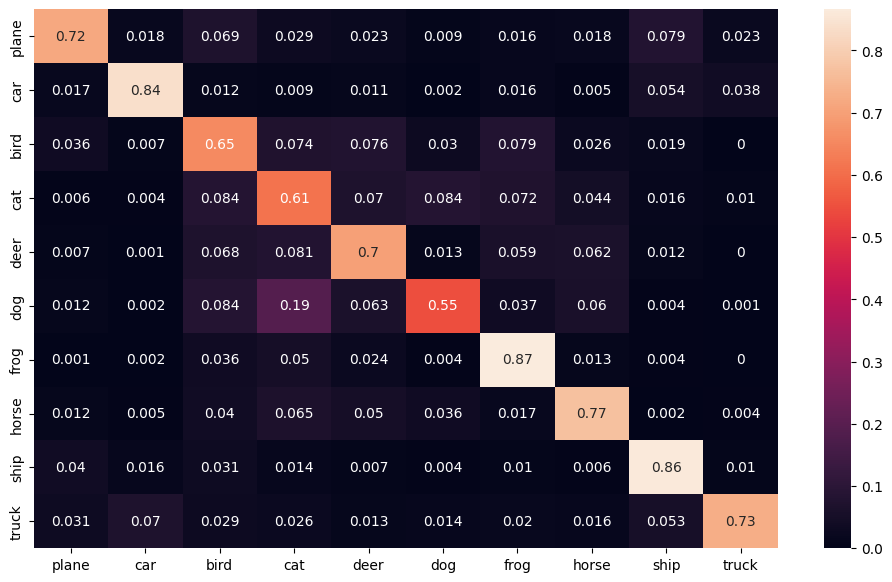

In [ ]:
y_pred = []
y_true = []

# iterate over test data
for x, y in torch.utils.data.DataLoader(dataset=testset, batch_size=1):

    x = x.to(device)
    y = y.to(device)
    z = model_1(x)
    _, yhat = torch.max(z, 1)
    pred = yhat.data.cpu().numpy()
    y_pred.extend(pred) # save prediction

    labels = y.data.cpu().numpy()
    y_true.extend(labels) # save ground truth

# confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sns.heatmap(df_cm, annot=True)
plt.show()

# Convolutional Neural Network (2)

In [ ]:
class CNN_2(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3,32,3,padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Dropout(0.25),

            nn.Conv2d(32,64,3,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Dropout(0.25),

            nn.Conv2d(64,128,3,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Dropout(0.25),

            nn.Conv2d(128,128,3,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Dropout(0.25),

            nn.Conv2d(128,128,3,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Dropout(0.25),

            nn.Flatten(),
            nn.Linear(128*4*4,512),
            nn.ReLU(),
            nn.Linear(512,256),
            nn.ReLU(),
            nn.Linear(256,10)
            )

    def forward(self,x):
        return self.network(x)

In [ ]:
model_2 = CNN_2()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_2.to(device)

CNN_2(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.25, inplace=False)
    (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU()
    (8): Dropout(p=0.25, inplace=False)
    (9): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (13): Dropout(p=0.25, inplace=False)
    (14): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): BatchNorm2d(128, eps=1e-05, momentum=0.1, affin

In [ ]:
epochs = 10
#model_2 = CNN_2()
criterion = nn.CrossEntropyLoss() # loss function
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001)

_, _, _, _, = train_model(model_2, epochs, trainloader, valloader, criterion, optimizer)

Epoch: 1 | Train Loss: 1.4529 | Train Accuracy: 46.3396 | Validation Loss: 1.2307 | Validation Accuracy: 56.5805 | Time: 25.43
Epoch: 2 | Train Loss: 1.0698 | Train Accuracy: 62.0797 | Validation Loss: 0.9446 | Validation Accuracy: 67.8185 | Time: 23.59
Epoch: 3 | Train Loss: 0.9083 | Train Accuracy: 67.9794 | Validation Loss: 0.8306 | Validation Accuracy: 70.4327 | Time: 23.79
Epoch: 4 | Train Loss: 0.8072 | Train Accuracy: 71.7824 | Validation Loss: 0.7479 | Validation Accuracy: 74.1486 | Time: 24.46
Epoch: 5 | Train Loss: 0.7334 | Train Accuracy: 74.1243 | Validation Loss: 0.7399 | Validation Accuracy: 74.2889 | Time: 23.91
Epoch: 6 | Train Loss: 0.6777 | Train Accuracy: 76.4336 | Validation Loss: 0.6473 | Validation Accuracy: 77.8646 | Time: 23.70
Epoch: 7 | Train Loss: 0.6308 | Train Accuracy: 77.8473 | Validation Loss: 0.6274 | Validation Accuracy: 79.0064 | Time: 23.81
Epoch: 8 | Train Loss: 0.5948 | Train Accuracy: 79.2609 | Validation Loss: 0.6567 | Validation Accuracy: 78.515

#### validation

In [ ]:
# tuning of hyper-parameters using Adam
learning_rates = [0.1, 0.01, 0.001, 0.0001]

for lr in learning_rates:
    model_2 = CNN_2()
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model_2.parameters(), lr=lr)

    train_losses = []
    train_accs = []
    val_losses = []
    val_accs = []

    print("Learning rate:", lr)

    for epoch in range(10):
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        model_2 = model_2.to(device)

        train_running_loss = 0.0
        train_acc = 0.0
        val_running_loss = 0.0
        val_acc = 0.0

        # Set the model to training mode
        model_2 = model_2.train()
        start = time()

        ## training step
        for i, (images, labels) in enumerate(trainloader):

            images = images.to(device)
            labels = labels.to(device)

            ## forward + backprop + loss
            logits = model_2(images)
            loss = criterion(logits, labels)

            # Reset the gradients to zero
            optimizer.zero_grad()

            loss.backward()

            ## update model params
            optimizer.step()

            train_running_loss += loss.item()
            train_acc += get_accuracy(logits, labels)

        train_losses.append(train_running_loss / i)
        train_accs.append(train_acc/i)

        ## validation step
        with torch.no_grad():
            model_2 = model_2.eval()
            for j, (images, labels) in enumerate(valloader):

                images = images.to(device)
                labels = labels.to(device)

                logits = model_2(images)
                loss = criterion(logits, labels)

                val_running_loss += loss.item()
                val_acc += get_accuracy(logits, labels)

        val_losses.append(val_running_loss / j)
        val_accs.append(val_acc/j)

        model_2.eval()
        print(f"Epoch: {epoch+1} | Train Loss: {train_losses[-1]:.4f} | Train Accuracy: {train_accs[-1]:.4f} | Validation Loss: {val_losses[-1]:.4f} | Validation Accuracy: {val_accs[-1]:.4f} | Time: {time()-start:.2f}")

Learning rate: 0.1
Epoch: 1 | Train Loss: 7.7086 | Train Accuracy: 9.9405 | Validation Loss: 2.3169 | Validation Accuracy: 10.3065 | Time: 23.98
Epoch: 2 | Train Loss: 2.3181 | Train Accuracy: 9.8254 | Validation Loss: 2.3150 | Validation Accuracy: 10.0461 | Time: 24.14
Epoch: 3 | Train Loss: 2.3179 | Train Accuracy: 10.2282 | Validation Loss: 2.3197 | Validation Accuracy: 10.3065 | Time: 24.75
Epoch: 4 | Train Loss: 2.3184 | Train Accuracy: 9.6452 | Validation Loss: 2.3230 | Validation Accuracy: 9.8558 | Time: 23.95
Epoch: 5 | Train Loss: 2.3181 | Train Accuracy: 10.1581 | Validation Loss: 2.3300 | Validation Accuracy: 10.3065 | Time: 23.90
Epoch: 6 | Train Loss: 2.3175 | Train Accuracy: 9.6903 | Validation Loss: 2.3189 | Validation Accuracy: 10.3065 | Time: 24.16
Epoch: 7 | Train Loss: 2.3181 | Train Accuracy: 9.8404 | Validation Loss: 2.3158 | Validation Accuracy: 9.8558 | Time: 24.17
Epoch: 8 | Train Loss: 2.3167 | Train Accuracy: 9.9505 | Validation Loss: 2.3213 | Validation Accur

#### testing

In [ ]:
epochs = 30
#model_2 = CNN_2()
criterion = nn.CrossEntropyLoss() # loss function
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001)

train_losses_2, train_accs_2, test_losses_2, test_accs_2, = test_model(model_2, epochs, trainloader, testloader, criterion, optimizer)

Epoch: 1 | Train Loss: 0.9725 | Train Accuracy: 65.9903 | Test Loss: 0.8610 | Test Accuracy: 70.2524 | Time: 23.96
Epoch: 2 | Train Loss: 0.8176 | Train Accuracy: 71.3696 | Test Loss: 0.7988 | Test Accuracy: 73.1070 | Time: 23.67
Epoch: 3 | Train Loss: 0.7346 | Train Accuracy: 74.3119 | Test Loss: 0.7745 | Test Accuracy: 73.9884 | Time: 23.74
Epoch: 4 | Train Loss: 0.6705 | Train Accuracy: 76.6413 | Test Loss: 0.6380 | Test Accuracy: 78.3754 | Time: 23.55
Epoch: 5 | Train Loss: 0.6136 | Train Accuracy: 78.7105 | Test Loss: 0.6482 | Test Accuracy: 78.6959 | Time: 33.90
Epoch: 6 | Train Loss: 0.5596 | Train Accuracy: 80.5044 | Test Loss: 0.6076 | Test Accuracy: 79.7376 | Time: 31.75
Epoch: 7 | Train Loss: 0.5304 | Train Accuracy: 81.3676 | Test Loss: 0.6084 | Test Accuracy: 80.1182 | Time: 24.03
Epoch: 8 | Train Loss: 0.4872 | Train Accuracy: 82.9063 | Test Loss: 0.6155 | Test Accuracy: 79.6675 | Time: 23.76
Epoch: 9 | Train Loss: 0.4530 | Train Accuracy: 84.0072 | Test Loss: 0.6111 | Te

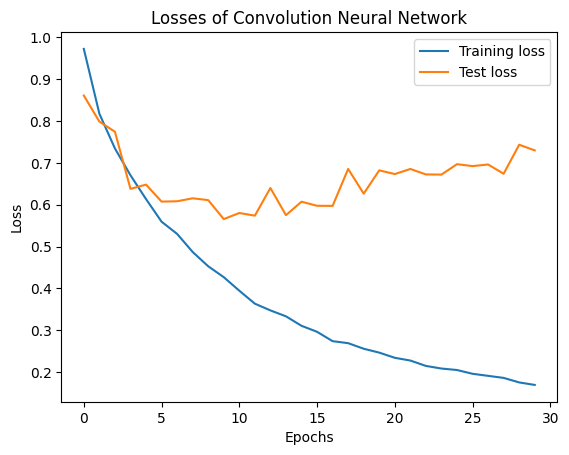

In [ ]:
plt.plot(train_losses_2, label='Training loss')
plt.plot(test_losses_2, label='Test loss')
plt.legend()
plt.title('Losses of Convolution Neural Network')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

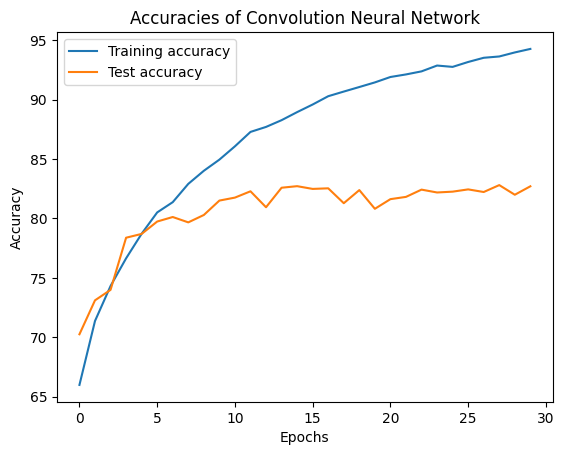

In [ ]:
plt.plot(train_accs_2, label='Training accuracy')
plt.plot(test_accs_2, label='Test accuracy')
plt.legend()
plt.title('Accuracies of Convolution Neural Network')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

#### result

In [ ]:
correct = 0
total = 0

# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        # calculate outputs by running images through the network
        outputs = model_2(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: {:.2f}%'.format(
    100 * correct / total))  # 82.64%

Accuracy of the network on the 10000 test images: 82.44%


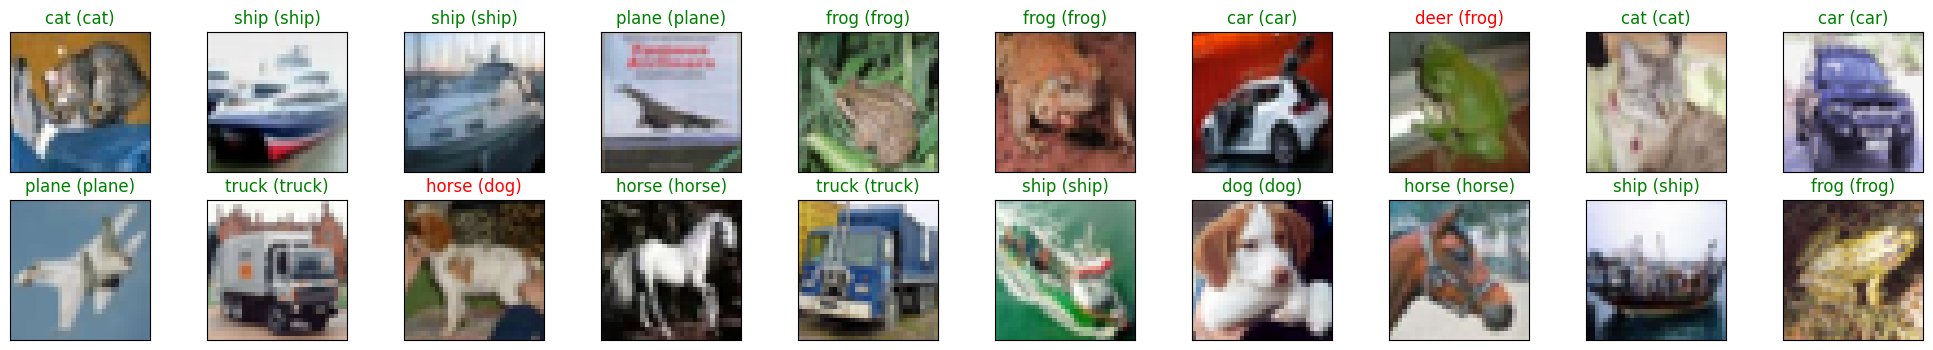

In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)
images = images.to(device)
labels = labels.to(device)
output = model_2(images)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color=("green" if preds[idx]==labels[idx] else "red"))


In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = model_2(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class plane is: 85.3 %
Accuracy for class car   is: 91.9 %
Accuracy for class bird  is: 71.6 %
Accuracy for class cat   is: 64.3 %
Accuracy for class deer  is: 84.5 %
Accuracy for class dog   is: 73.2 %
Accuracy for class frog  is: 88.0 %
Accuracy for class horse is: 85.2 %
Accuracy for class ship  is: 92.7 %
Accuracy for class truck is: 87.7 %


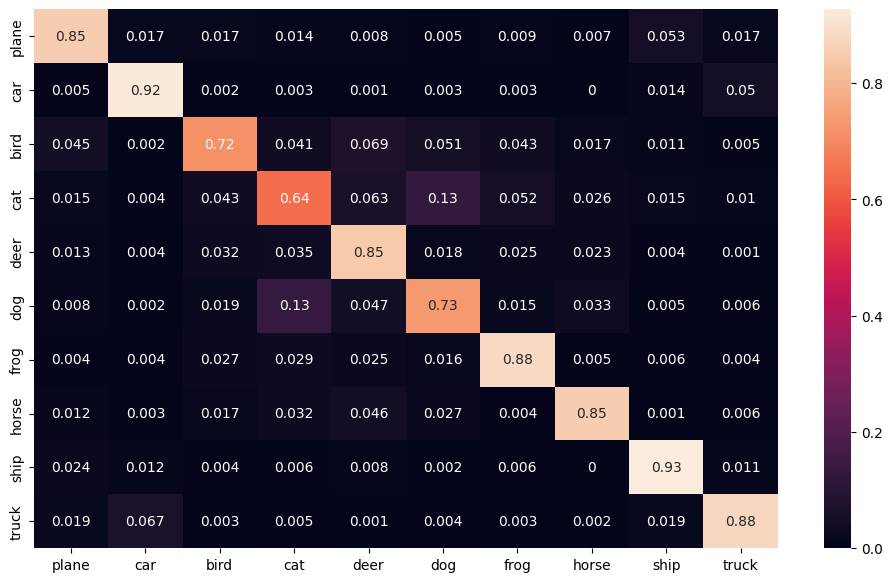

In [ ]:
y_pred = []
y_true = []

# iterate over test data
for x, y in torch.utils.data.DataLoader(dataset=testset, batch_size=1):

    x = x.to(device)
    y = y.to(device)
    z = model_2(x)
    _, yhat = torch.max(z, 1)
    pred = yhat.data.cpu().numpy()
    y_pred.extend(pred) # save prediction

    labels = y.data.cpu().numpy()
    y_true.extend(labels) # save ground truth

# confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sns.heatmap(df_cm, annot=True)
plt.show()